In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar
import openpyxl

In [ ]:
df1 = pd.read_excel('01_January.xlsx', engine= 'openpyxl')
df2 = pd.read_excel('02_February.xlsx', engine= 'openpyxl')
df3 = pd.read_excel('03_March.xlsx', engine= 'openpyxl')

In [45]:
#gathering and cleaning the data
monthly_data = ['01_January.xlsx','02_February.xlsx','03_March.xlsx']
combined_data = pd.DataFrame()
for file in monthly_data:
    df = pd.read_excel(file, engine = 'openpyxl')
    df.dropna(inplace = True)
    df['Date'] = df['Date'].dt.date
    df['Day'] = pd.DatetimeIndex(df['Date']).day
    df['month'] = pd.DatetimeIndex(df['Date']).month
    df['Year'] = pd.DatetimeIndex(df['Date']).year
    df['Month'] = df['month'].apply(lambda x: calendar.month_abbr[int(x)])
    combined_data =combined_data.append(df,ignore_index =True)
    combined_data.drop(columns=['month'],axis = 1, inplace = True)
    combined_data.to_excel('q1sales.xlsx', index = False)
    


In [47]:
combined_data.sample(5)

,Date,Sales,Day,Year,Month
2,2020-01-03,4985.0,3,2020,Jan
54,2020-02-24,6270.0,24,2020,Feb
28,2020-01-29,7602.0,29,2020,Jan
87,2020-03-28,5614.0,28,2020,Mar
12,2020-01-13,7231.0,13,2020,Jan


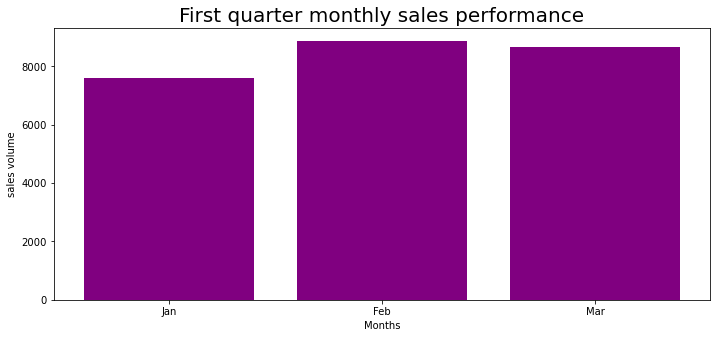

In [143]:
# ploting sales report for months
plt.figure(figsize = [40,5])
plt.subplot(1,3,1)
x = combined_data['Month']
y = combined_data['Sales']
plt.bar(x, y, color ='purple')
plt.title('First quarter monthly sales performance', fontsize = 20)
plt.xlabel('Months')
plt.ylabel('sales volume')
plt.show();


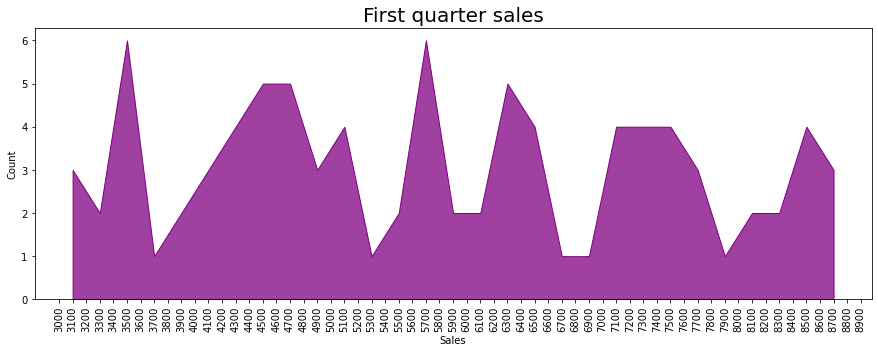

In [138]:
# plot showing all sales in the first quarter
plt.figure(figsize=(15,5))
sns.histplot(data = combined_data,x = 'Sales', color = 'purple',bins = bins,element = 'poly',shrink = 0.5)
bins = np.arange(3000,combined_data['Sales'].max()+100, 200)
plt.title('First quarter sales', fontsize = 20)
plt.xticks(np.arange(3000,9000, 100),rotation=90);

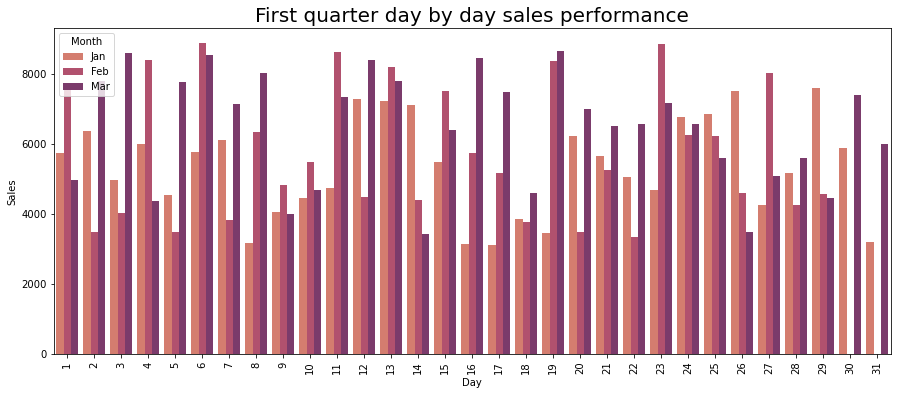

In [140]:
# plot showing the day by day performance in the first quarter
plt.figure(figsize=(15,6))
sns.barplot(data = combined_data,x = 'Day',y='Sales', color = 'purple',hue='Month', palette ='flare')
plt.title('First quarter day by day sales performance', fontsize = 20)
plt.xticks(rotation= 90);